# Practica 1: Números singulares
(rev 21/01/24)

In [59]:
# imports
import random
from time import process_time_ns as pt

# we use nd for vector operations and linear and polynomial fit
import numpy as nd
from itertools import compress

import matplotlib.pyplot as plt

In [60]:
def buildRandomList(len, maxVal):
    return [random.randint(0,maxVal) for _ in range(len)]

print ("buildRandomList defined")

buildRandomList defined


# Lets do a simple pythonic algorithm, using the sum function 

In [61]:
def findSingularNumsV0(vec):
    average = vec[0]
    singular = []
    for k in range (1,len(vec)):
        if vec[k] == sum(vec[:k])/k: 
            singular.append(k)
    
    return singular
print ("findSingularNumsV2 defined")

findSingularNumsV2 defined


### What is the complexity of this code ?
* There is a k loop at line 4
* ... and an implicit loop in the sum

Both are of O(n) where n in the length of the sequence.... 

$\Rightarrow $ the complexity of this code is $ O(n^2)$

Let measure it and prove it is so...

In [62]:
max_value = 100
repeatTimes = 1000
x = []
exeTimes = []

for i in range(1,12):
    n = 2**i
    # print (F"Measuring Alg for length {n}. Repeating {repeatTimes} Times")
    processTime = []
    
    for trial in range(repeatTimes):
        vec = buildRandomList(n,max_value)
        t0 = pt()
        findSingularNumsV0(vec)
        processTime.append((pt() - t0)/1E6)
    
    mean = nd.mean(processTime)
    dev  = nd.std(processTime)
    x.append(n);exeTimes.append(mean)
    print (F"Find singularName alg for length {n} mean={mean:.6f} ms dev={dev:.6f} ms")    
    

Find singularName alg for length 2 mean=0.002673 ms dev=0.006699 ms
Find singularName alg for length 4 mean=0.002865 ms dev=0.000452 ms
Find singularName alg for length 8 mean=0.004259 ms dev=0.005331 ms
Find singularName alg for length 16 mean=0.008154 ms dev=0.014999 ms
Find singularName alg for length 32 mean=0.015217 ms dev=0.004395 ms
Find singularName alg for length 64 mean=0.040509 ms dev=0.021176 ms
Find singularName alg for length 128 mean=0.157804 ms dev=0.039347 ms
Find singularName alg for length 256 mean=0.337704 ms dev=0.090433 ms
Find singularName alg for length 512 mean=1.096055 ms dev=0.155431 ms
Find singularName alg for length 1024 mean=4.631461 ms dev=0.985194 ms
Find singularName alg for length 2048 mean=16.280107 ms dev=2.024628 ms


   2  0.002673 , -0.022610 ,0.025283 
   4  0.002865 , -0.021007 ,0.023872 
   8  0.004259 , -0.017716 ,0.021974 
  16  0.008154 , -0.010796 ,0.018950 
  32  0.015217 , 0.004393 ,0.010824 
  64  0.040509 , 0.040166 ,0.000343 
 128  0.157804 , 0.133297 ,0.024506 
 256  0.337704 , 0.405899 ,-0.068195 
 512  1.096055 , 1.296456 ,-0.200401 
1024  4.631461 , 4.458990 ,0.172471 
2048  16.280107 , 16.309734 ,-0.029627 


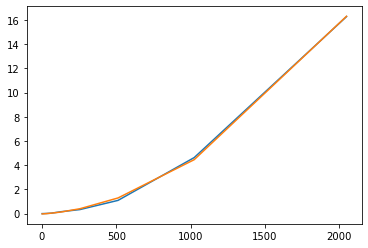

In [63]:
fit  = nd.polyfit(x,exeTimes,2)
linfit = (fit[2]+ fit[1]*nd.array(x)+ fit[0]*(nd.array(x)**2)) 
for n,a,b in zip(x, exeTimes, linfit):
    print ( f"{n:4d}  {a:.6f} , {b:.6f} ,{(a-b):.6f} ")
    

fig, ax = plt.subplots()


ax.plot(x, exeTimes)
ax.plot(x, linfit)

plt.show()

# Let be Smarter that that
Lets compute the averages on a recursive, incremental way. Notice that:

$$ \bar a_k  =   \bar a_{k-1} + { {a_k - \bar a_{k-1}}\over{k}}$$

In [64]:
def findSingularNumsV1(vec):
    average = vec[0]
    singular = []
    for k in range (1,len(vec)):
        average += (vec[k-1] - average)/k
        if vec[k] == average:
            singular.append(k)
    
    return singular
print ("findSingularNums V1  defined")

findSingularNums V1  defined


In [65]:
# test case, should return two singular positions at 3, and 7
vec = [8, 9, 4, 7, 20, 10, 5, 9, 2]
print  (findSingularNumsV1(vec))

[3, 7]


### Lets see that the algorithm is linear....

Regardless of the larger, but n-independent complexity of the loop, it iterates n times, so complexity must be $O(n)$, that is it runs in **linear time**

Let's see it experimentally

In [66]:

max_value = 100
repeatTimes = 1000
x = []
exeTimes = []

for i in range(1,12):
    n = 2**i
    # print (F"Measuring Alg for length {n}. Repeating {repeatTimes} Times")
    processTime = []
    
    for trial in range(repeatTimes):
        vec = buildRandomList(n,max_value)
        t0 = pt()
        findSingularNumsV1(vec)
        processTime.append((pt() - t0)/1E6)
    
    mean = nd.mean(processTime)
    dev  = nd.std(processTime)
    x.append(n);exeTimes.append(mean)
    print (F"Find singularName alg for length {n} mean={mean:.6f} ms dev={dev:.6f} ms")    
    

Find singularName alg for length 2 mean=0.003992 ms dev=0.020215 ms
Find singularName alg for length 4 mean=0.004772 ms dev=0.006718 ms
Find singularName alg for length 8 mean=0.005883 ms dev=0.007254 ms
Find singularName alg for length 16 mean=0.005554 ms dev=0.001622 ms
Find singularName alg for length 32 mean=0.009571 ms dev=0.003021 ms
Find singularName alg for length 64 mean=0.017498 ms dev=0.005472 ms
Find singularName alg for length 128 mean=0.034969 ms dev=0.016976 ms
Find singularName alg for length 256 mean=0.049613 ms dev=0.011970 ms
Find singularName alg for length 512 mean=0.115358 ms dev=0.066101 ms
Find singularName alg for length 1024 mean=0.248546 ms dev=0.078102 ms
Find singularName alg for length 2048 mean=0.459422 ms dev=0.127008 ms


   2  0.003992 , 0.003336 ,0.000656 
   4  0.004772 , 0.003787 ,0.000985 
   8  0.005883 , 0.004689 ,0.001193 
  16  0.005554 , 0.006494 ,-0.000940 
  32  0.009571 , 0.010103 ,-0.000532 
  64  0.017498 , 0.017321 ,0.000177 
 128  0.034969 , 0.031756 ,0.003213 
 256  0.049613 , 0.060628 ,-0.011015 
 512  0.115358 , 0.118372 ,-0.003014 
1024  0.248546 , 0.233859 ,0.014687 
2048  0.459422 , 0.464833 ,-0.005411 


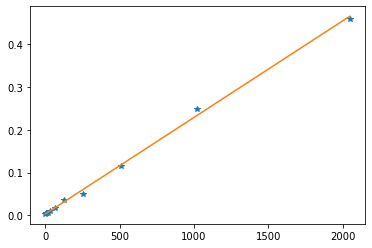

In [67]:
def new_func():
    fit  = nd.polyfit(x,exeTimes,1)
    linfit = (fit[1]+ fit[0]*nd.array(x)) 
    for n,a,b in zip(x, exeTimes, linfit):
        print ( f"{n:4d}  {a:.6f} , {b:.6f} ,{(a-b):.6f} ")
    

    fig, ax = plt.subplots()


    ax.plot(x, exeTimes,'*')
    ax.plot(x, linfit)

    plt.show()

new_func()

### here is a vector implementation of the above V1 coce, using vectorized python

In [75]:
def findSingularNumsV2(vec):
    aver = nd.zeros(len(vec))
    
    aver[0] = aver[1] = vec[0]
    for k in range (2,len(vec)):
        aver[k] = aver[k-1] +  (vec[k-1] - aver[k-1])/k
        
    singular = (vec == aver)
            
    return list(compress(vec,singular))
print ("findSingularNumsv2 defined")

vec = [8, 9, 4, 7, 20, 10, 5, 9, 2]
print  (findSingularNumsV2(vec))

findSingularNumsv2 defined
[8, 7, 9]


In [69]:
max_value = 100
repeatTimes = 1000
x = []
exeTimes = []

for i in range(1,12):
    n = 2**i
    # print (F"Measuring Alg for length {n}. Repeating {repeatTimes} Times")
    processTime = []
    
    for trial in range(repeatTimes):
        vec = nd.array(buildRandomList(n,max_value))
        t0 = pt()
        findSingularNumsV2(vec)
        processTime.append((pt() - t0)/1E6)
    
    mean = nd.mean(processTime)
    dev  = nd.std(processTime)
    x.append(n);exeTimes.append(mean)
    print (F"Find singularName alg for length {n} mean={mean:.6f} ms dev={dev:.6f} ms")    

Find singularName alg for length 2 mean=0.024484 ms dev=0.055957 ms
Find singularName alg for length 4 mean=0.025803 ms dev=0.013329 ms
Find singularName alg for length 8 mean=0.025644 ms dev=0.007642 ms
Find singularName alg for length 16 mean=0.031194 ms dev=0.017173 ms
Find singularName alg for length 32 mean=0.054781 ms dev=0.034409 ms
Find singularName alg for length 64 mean=0.081558 ms dev=0.014571 ms
Find singularName alg for length 128 mean=0.149709 ms dev=0.020976 ms
Find singularName alg for length 256 mean=0.330070 ms dev=0.086689 ms
Find singularName alg for length 512 mean=0.696810 ms dev=0.188783 ms
Find singularName alg for length 1024 mean=1.311803 ms dev=0.339459 ms
Find singularName alg for length 2048 mean=2.338166 ms dev=0.552033 ms


# We can go even Further V3
It can demostrated that  if $a_j$  is singular then $a_k$  for $ k > j $ it is also singular if : 
$$ q = \sum_{i = j+1}^{i=k-1}(a_i-a_j)/k \enspace ; \enspace  q  \in \cal{Q} $$
$$a_k = a_j + q $$
where $ \cal{Q}$  is the set of whole positive numbers.  
That is the **increment  is a multiple of k, making the new average an whole  number** 

### this leads to another recurvise, but still linear algorithm, our V3

In [70]:
 
def findSingularNumsV3(vec, offset, singularValues):
    k = 1
    k_abs = offset+1
    summ = 0
    while k < len(vec):
        q = (summ - vec[0]*(k-1))
        if ( q % k_abs == 0  ) and vec[k] == (vec[0] + q / k_abs):
            singularValues.append((k_abs,vec[k]))
            
            # now go find the next in the fw part of the list, starting at the last singular value found
            findSingularNumsV3(vec[k:],k_abs,singularValues)
            
            # as the return break out
            break
        
        else:
             # prepare the summ for the next...
            summ += vec[k]
            k  += 1
            k_abs += 1

    return singularValues
vec = [8, 9, 4, 7, 20, 10, 5, 9, 2]
findSingularNumsV3(vec,0,[])


[(3, 7), (7, 9)]

### Again, lets benchmark this last code V3

In [71]:
max_value = 100
repeatTimes = 1000
x = []
exeTimes = []

for i in range(1,14):
    n = 2**i
    # print (F"Measuring Alg for length {n}. Repeating {repeatTimes} Times")
    processTime = []
    
    for trial in range(repeatTimes):
        vec = buildRandomList(n,max_value)
        t0 = pt()
        findSingularNumsV3(vec,0,[])
        processTime.append((pt() - t0)/1E6)
    
    mean = nd.mean(processTime)
    dev  = nd.std(processTime)
    x.append(n);exeTimes.append(mean)
    print (F"Find singularName alg for length {n} mean={mean:.6f} ms dev={dev:.6f} ms")    

Find singularName alg for length 2 mean=0.003175 ms dev=0.006534 ms
Find singularName alg for length 4 mean=0.005336 ms dev=0.001525 ms
Find singularName alg for length 8 mean=0.007739 ms dev=0.001688 ms
Find singularName alg for length 16 mean=0.012276 ms dev=0.002438 ms
Find singularName alg for length 32 mean=0.016773 ms dev=0.004782 ms
Find singularName alg for length 64 mean=0.035351 ms dev=0.009555 ms
Find singularName alg for length 128 mean=0.069426 ms dev=0.012462 ms
Find singularName alg for length 256 mean=0.108012 ms dev=0.037353 ms
Find singularName alg for length 512 mean=0.187250 ms dev=0.056177 ms
Find singularName alg for length 1024 mean=0.364702 ms dev=0.080054 ms
Find singularName alg for length 2048 mean=0.842390 ms dev=0.233032 ms
Find singularName alg for length 4096 mean=1.718349 ms dev=0.460887 ms
Find singularName alg for length 8192 mean=3.221961 ms dev=0.657674 ms


   2  0.003175 , 0.007069 ,-0.003894 
   4  0.005336 , 0.007864 ,-0.002528 
   8  0.007739 , 0.009454 ,-0.001715 
  16  0.012276 , 0.012633 ,-0.000357 
  32  0.016773 , 0.018993 ,-0.002220 
  64  0.035351 , 0.031712 ,0.003639 
 128  0.069426 , 0.057149 ,0.012277 
 256  0.108012 , 0.108024 ,-0.000011 
 512  0.187250 , 0.209773 ,-0.022523 
1024  0.364702 , 0.413272 ,-0.048571 
2048  0.842390 , 0.820271 ,0.022120 
4096  1.718349 , 1.634267 ,0.084083 
8192  3.221961 , 3.262260 ,-0.040299 


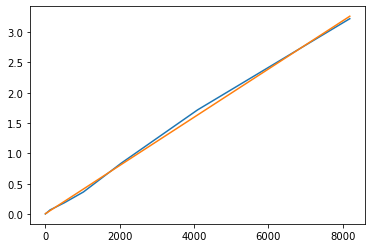

In [72]:
fit  = nd.polyfit(x,exeTimes,1)
linfit = (fit[1]+ fit[0]*nd.array(x)) 
for n,a,b in zip(x, exeTimes, linfit):
    print ( f"{n:4d}  {a:.6f} , {b:.6f} ,{(a-b):.6f} ")

fig, ax = plt.subplots()


ax.plot(x, exeTimes)
ax.plot(x, linfit)

plt.show()

In [73]:
n = 10000
maxVal = 100
repeat = 5
for _ in range(repeat):
    sn = findSingularNumsV3(buildRandomList(n,maxVal),0,[])
    if len(sn) > 0: print (_,sn)

In [74]:
# lets do a further check. 
findSingularNumsV3([1]*10,0,[])

[(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]